<a href="https://colab.research.google.com/github/ayarii/CGT/blob/master/learner_'s_engagement_2method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Import data from Google Drive**

In [103]:
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import datetime
from tensorflow import keras
from tensorflow.keras.models import Model
import tensorflow as tf
import pathlib
import os
import zipfile
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_curve, auc
from tensorflow.keras import layers



In [104]:
#Import dataset
data_dir = tf.keras.utils.get_file(
    "dataset.zip",
    "https://github.com/ayarii/learner-engagement/blob/main/Student-engagement-dataset.zip?raw=true",
    extract=False)
with zipfile.ZipFile(data_dir, 'r') as zip_ref:
    zip_ref.extractall('/content/datasets')
data_dir = pathlib.Path('/content/datasets/Student-engagement-dataset')
print(data_dir)
print(os.path.abspath(data_dir))

/content/datasets/Student-engagement-dataset
/content/datasets/Student-engagement-dataset


In [105]:
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

2120


Populating the interactive namespace from numpy and matplotlib
Shape of the image (72307,)


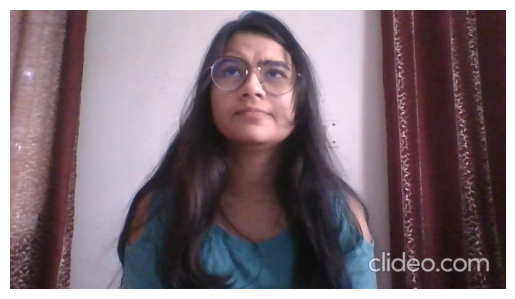

Shape of the image (19745,)


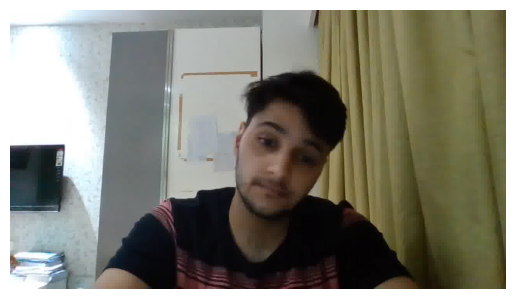

Shape of the image (21216,)


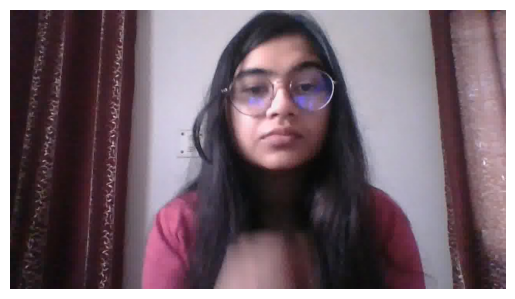

Shape of the image (21813,)


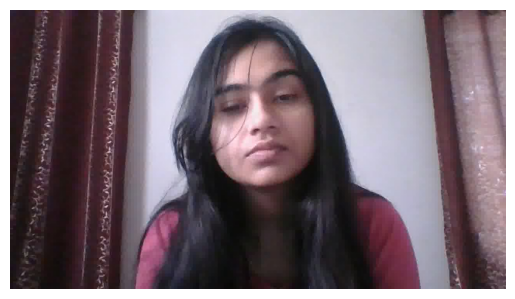

Shape of the image (17353,)


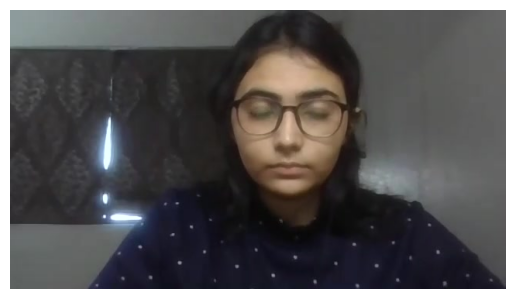

Shape of the image (44759,)


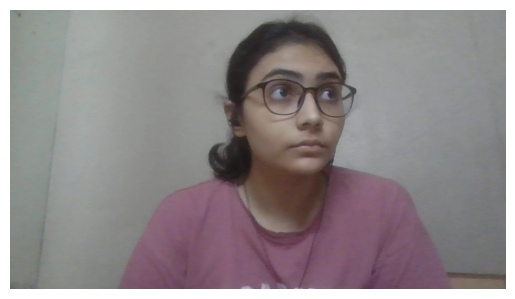

In [106]:
%pylab inline
#learner confused
url_confused = r'https://github.com/ayarii/learner-engagement/blob/main/0020.jpg?raw=true'
resp = requests.get(url_confused, stream=True).raw
image_array_confused = np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Shape of the image {image_array_confused.shape}')
image_confused = cv2.imdecode(image_array_confused, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_confused, cv2.COLOR_BGR2RGB))
plt.show()

#learner frustrated
url_frustrated = r'https://github.com/ayarii/learner-engagement/blob/main/135.jpg?raw=true'
resp = requests.get(url_frustrated, stream=True).raw
image_array_frustrated= np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Shape of the image {image_array_frustrated.shape}')
image_frustrated = cv2.imdecode(image_array_frustrated, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_frustrated, cv2.COLOR_BGR2RGB))
plt.show()

#learner engaged
url_engaged = r'https://github.com/ayarii/learner-engagement/blob/main/0076.jpg?raw=true'
resp = requests.get(url_engaged, stream=True).raw
image_array_engagement = np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Shape of the image {image_array_engagement.shape}')
image_engagement = cv2.imdecode(image_array_engagement, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_engagement, cv2.COLOR_BGR2RGB))
plt.show()

#learner bored
url_bored = r'https://github.com/ayarii/learner-engagement/blob/main/0153.jpg?raw=true'
resp = requests.get(url_bored, stream=True).raw
image_array_bored = np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Shape of the image {image_array_bored.shape}')
image_bored = cv2.imdecode(image_array_bored, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_bored, cv2.COLOR_BGR2RGB))
plt.show()

#learner drowsy
url_drowsy = r'https://github.com/ayarii/learner-engagement/blob/main/0021.jpg?raw=true'
resp = requests.get(url_drowsy, stream=True).raw
image_array_drowsy = np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Shape of the image {image_array_drowsy.shape}')
image_drowsy = cv2.imdecode(image_array_drowsy, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_drowsy, cv2.COLOR_BGR2RGB))
plt.show()

# learner looking_away
url_looking_away = r'https://github.com/ayarii/learner-engagement/blob/main/0011.jpg?raw=true'
resp = requests.get(url_looking_away, stream=True).raw
image_array_looking_away = np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Shape of the image {image_array_looking_away.shape}')
image_looking_away = cv2.imdecode(image_array_looking_away, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_looking_away, cv2.COLOR_BGR2RGB))
plt.show()

In [107]:
batch_size = 1
img_height = 200
img_width = 200
train_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  )

val_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = val_data.class_names
print(class_names)

Found 2120 files belonging to 6 classes.
Using 1696 files for training.
Found 2120 files belonging to 6 classes.
Using 424 files for validation.
['Looking Away', 'bored', 'confused', 'drowsy', 'engaged', 'frustrated']


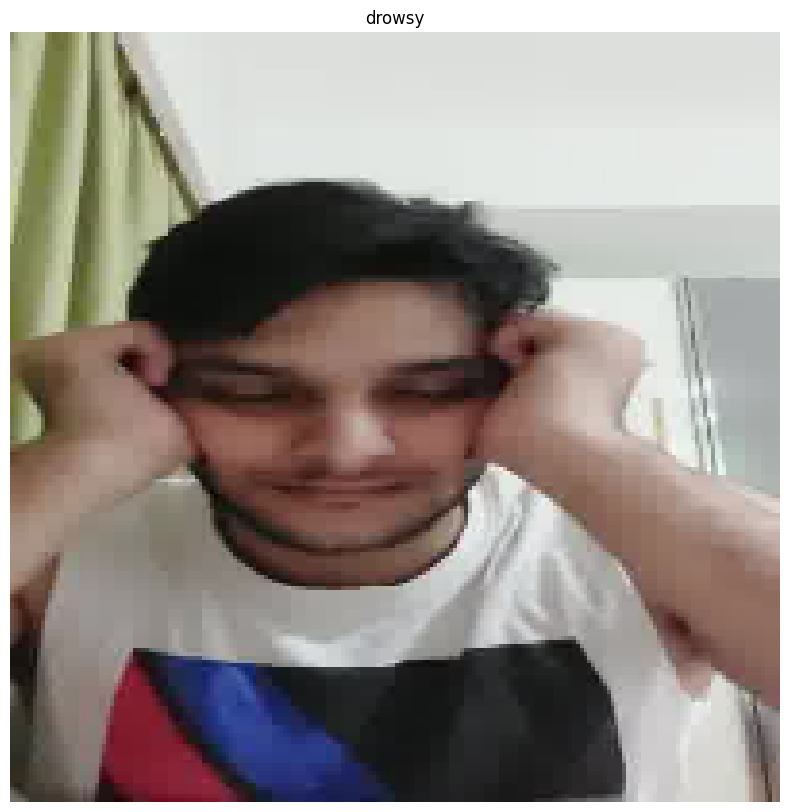

In [108]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(1):
    ax = plt.subplot(1, 1, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
num_classes = 6
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation

# Ensure the class names are retrieved correctly
class_names = train_data.class_names
print(class_names)

# Initialize the CNN for grayscale images
model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Display the model summary
model.summary()



#Cette ligne crée un rappel (callback) de TensorBoard pour enregistrer les journaux et visualiser les métriques et les graphiques lors de l'entraînement.
#Le paramètre log_dir spécifie le répertoire de stockage des journaux, histogram_freq=1 signifie que les histogrammes des poids du modèle seront enregistrés à chaque époque, write_images=logdir enregistre les images des données d'entrée, et embeddings_data=train_data spécifie les données d'entraînement utilisées pour les visualisations d'incorporation (embeddings).
#tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir,histogram_freq=1, write_images=logdir,embeddings_data=train_data)
# Exemple d'arrêt précoce après un certain nombre d'époques sans amélioration de la perte de validation
early_stopping = EarlyStopping(
    monitor='val_loss',  # Mesure à surveiller (perte de validation dans cet exemple)
    patience=5,  # Nombre d'époques sans amélioration avant l'arrêt
    restore_best_weights=True  # Restaurer les poids du meilleur modèle
)


# Initialize empty lists for features and labels
train_features = []
train_labels = []

# Iterate over the train_data dataset
for features, labels in train_data:
    train_features.append(features.numpy())
    train_labels.append(labels.numpy())

# Convert lists to NumPy arrays
X_train = X_train.reshape(-1, img_height, img_width, 1)
X_val = X_val.reshape(-1, img_height, img_width, 1)

# Repeat the same process for val_data
val_features = []
val_labels = []

for features, labels in val_data:
    val_features.append(features.numpy())
    val_labels.append(labels.numpy())

X_val = np.concatenate(val_features, axis=0)
y_val = np.concatenate(val_labels, axis=0)

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

#model.fit(train_data,validation_data=val_data,callbacks=[early_stopping])
#En résumé, le code compile le modèle en spécifiant l'optimiseur, la fonction de perte et les métriques, puis entraîne le modèle sur les données d'entraînement et évalue les performances sur les données de validation.
#Les journaux sont enregistrés pour permettre une analyse plus détaillée des métriques et des visualisations via TensorBoard.


['Looking Away', 'bored', 'confused', 'drowsy', 'engaged', 'frustrated']
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 200, 200, 1)       0         
                                                                 
 conv2d_53 (Conv2D)          (None, 198, 198, 32)      320       
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 99, 99, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_54 (Conv2D)          (None, 97, 97, 32)        9248      
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 48, 48, 32)        0         
 ng2D)                                                           
                                              

In [ ]:
model.summary()

In [ ]:
 # Convertir les étiquettes en une représentation binaire
from sklearn.preprocessing import label_binarize
binarized_labels = label_binarize(labels, classes=['Looking Away', 'bored', 'confused', 'drowsy', 'engaged', 'frustrated'])
n_classes = binarized_labels.shape[1]

# Calcul des scores prédits pour chaque classe
scores = model.predict(train_data)

# Calcul des taux de faux positif et de vrai positif pour chaque classe
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(binarized_labels[:, i], scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Tracer la courbe ROC pour chaque classe
plt.figure()
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, label='Classe {}: AUC = {:.2f}'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')  # Ligne en pointillés représentant le classificateur aléatoire
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
# Tracer la courbe de suivi de l'entraînement
plt.plot(train_data, label='Entraînement')
plt.plot(val_data, label='Validation')
plt.xlabel('Étape d\'entraînement')
plt.ylabel('Erreur')
plt.title('Courbe de suivi de l\'entraînement')
plt.legend()
plt.show()

In [ ]:
# Cette ligne importe la bibliothèque "files" de Google Colab, qui permet de charger des fichiers depuis votre ordinateur vers l'environnement Colab.
from google.colab import files
# Cette ligne demande à l'utilisateur de télécharger un fichier (une image dans ce cas) vers l'environnement Colab. Le fichier téléchargé sera stocké dans la variable file_to_predict.
file_to_predict = files.upload()
# Cette ligne itère sur les fichiers téléchargés (dans le cas où plusieurs fichiers auraient été téléchargés) et effectue les étapes suivantes pour chaque fichier.
for file_ in file_to_predict:
  #Cette ligne utilise la fonction cv2.imread de la bibliothèque OpenCV pour lire l'image téléchargée à partir du fichier.
  #L'image est stockée dans la variable image_to_predict.
    image_to_predict = cv2.imread(file_,cv2.IMREAD_COLOR)
    #Cette ligne affiche l'image en utilisant plt.imshow de la bibliothèque matplotlib.
    #cv2.cvtColor est utilisé pour convertir l'image du format BGR (utilisé par OpenCV) en format RGB (utilisé par matplotlib).
    plt.imshow(cv2.cvtColor(image_to_predict, cv2.COLOR_BGR2RGB))
    plt.show()
    #Cette ligne redimensionne l'image à une taille de 200x200 pixels à l'aide de cv2.resize et l'expands en ajoutant une dimension supplémentaire à l'aide de np.expand_dims.
    #Cela est nécessaire pour que l'image corresponde à la forme attendue par le modèle (une seule image avec les dimensions spécifiées).
    img_to_predict = np.expand_dims(cv2.resize(image_to_predict,(200,200)), axis=0)
    #Cette ligne effectue la prédiction en utilisant le modèle CNN entraîné (model.predict). La variable res contient les résultats de la prédiction.
    res = model.predict(img_to_predict)
predicted_class = np.argmax(res)  # Obtient l'indice de la classe prédite avec la plus haute probabilité
if predicted_class == 0:
    plt.imshow(cv2.cvtColor(image_engagement, cv2.COLOR_BGR2RGB))
    plt.show()
    print("Learner Engaged!")
elif predicted_class == 1:
    plt.imshow(cv2.cvtColor(image_notEngaged, cv2.COLOR_BGR2RGB))
    plt.show()
    print("Learner Not engaged!")
#Ce code permet de charger une image, de faire des prédictions avec le modèle CNN et d'afficher une image correspondant